In [4]:

import numpy as np # library to handle data in a vectorized manner
import time
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe


!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
import folium # map rendering library
from folium import plugins

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans



print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1

In [5]:
address = 'Mccallum Street, Singapore'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Singapore home are {}, {}.'.format(latitude, longitude))

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  from ipykernel import kernelapp as app


The geograpical coordinate of Singapore home are 1.2784801, 103.8493717.


In [6]:
neighborhood_latitude=1.2792655
neighborhood_longitude=103.8480938

In [7]:
CLIENT_ID = 'DVCxxxxxxxxxxxxxxxxxxxC0CFLF1T' # your Foursquare ID
CLIENT_SECRET = '5NWAGyyyyyyyyyyyyyyyyyyyyyyyyLFWL1' # your Foursquare Secret
VERSION = '2xxxxxxxxxxxxxxxxxx5' # Foursquare API version

#print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)

In [8]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=DVCxxxxxxxxxxxxxxxxxxxC0CFLF1T&client_secret=5NWAGyyyyyyyyyyyyyyyyyyyyyyyyLFWL1&v=2xxxxxxxxxxxxxxxxxx5&ll=1.2792655,103.8480938&radius=500&limit=100'

In [9]:
results = requests.get(url).json()

In [10]:

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [30]:

venues = results['response']['groups'][0]['items']
SGnearby_venues = json_normalize(venues) # flatten JSON
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
SGnearby_venues =SGnearby_venues.loc[:, filtered_columns]
# filter the category for each row
SGnearby_venues['venue.categories'] = SGnearby_venues.apply(get_category_type, axis=1)
# clean columns
SGnearby_venues.columns = [col.split(".")[-1] for col in SGnearby_venues.columns]

SGnearby_venues.shape

(84, 4)

In [39]:
venues = results['response']['groups'][0]['items']

nearby_venues = json_normalize(venues) # flatten JSON

   # columns only
filtered_columns = ['venue.name', 'venue.categories','venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

   # only one category per a row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type,axis=1)

   # columns cleaning up
nearby_venues.columns = [col.split(".")[-1] for col in 
nearby_venues.columns]

nearby_venues.head()

name      categories        lat       lng
0                    Mmmozza  Sandwich Place  48.863910  2.360591
1       Chez Alain Miam Miam  Sandwich Place  48.862369  2.361950
2      Fromagerie Jouannault     Cheese Shop  48.862947  2.362530
3           Square du Temple            Park  48.864475  2.360816
4  Marché des Enfants Rouges  Farmers Market  48.862806  2.361996

In [31]:
venues = results['response']['groups'][0]['items']

In [13]:

def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
    
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
    return new_york_data

In [14]:
new_york_data=get_new_york_data()
new_york_data.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

In [15]:
results = requests.get(url).json()
results

{'meta': {'code': 400,
  'errorType': 'invalid_auth',
  'errorDetail': 'Missing access credentials. See https://developer.foursquare.com/docs/api/configuration/authentication for details.',
  'requestId': '5eb63665963d29001b8c8cd6'},
 'response': {}}

In [16]:
results


{'meta': {'code': 400,
  'errorType': 'invalid_auth',
  'errorDetail': 'Missing access credentials. See https://developer.foursquare.com/docs/api/configuration/authentication for details.',
  'requestId': '5eb63665963d29001b8c8cd6'},
 'response': {}}

In [17]:
paris = pd.read_csv('https://raw.githubusercontent.com/AR-data-science/Coursera_Capstone/master/Arrondissements_.csv')
paris

CAR                 NAME      NSQAR  CAR.1  CARINSEE         LAR  \
0     3               Temple  750000003      3         3   3eme Ardt   
1    19      Buttes-Chaumont  750000019     19        19  19eme Ardt   
2    14         Observatoire  750000014     14        14  14eme Ardt   
3    10             Entrepot  750000010     10        10  10eme Ardt   
4    12              Reuilly  750000012     12        12  12eme Ardt   
5    16                Passy  750000016     16        16  16eme Ardt   
6    11           Popincourt  750000011     11        11  11eme Ardt   
7     2               Bourse  750000002      2         2   2eme Ardt   
8     4       Hotel-de-Ville  750000004      4         4   4eme Ardt   
9    17  Batignolles-Monceau  750000017     17        17  17eme Ardt   
10   18    Buttes-Montmartre  750000018     18        18  18eme Ardt   
11    1               Louvre  750000001      1         1    1er Ardt   
12    5             Pantheon  750000005      5         5   5eme Ardt   
13    7       Palais-Bourbon  750000007      7         7   7eme Ardt   
14   20         Menilmontant  750000020     20        20  20eme Ardt   
15    8               elysee  750000008      8         8   8eme Ardt   
16    9                Opera  750000009      9         9   9eme Ardt   
17   13             Gobelins  750000013     13        13  13eme Ardt   
18   15            Vaugirard  750000015     15        15  15eme Ardt   
19    6           Luxembourg  750000006      6         6   6eme Ardt   

        NSQCO      SURFACE  PERIMETRE  Geometry_X  Geometry_Y  
0   750001537   1170882828    4519264   48.862872    2.360001  
1   750001537   6792651129   11253182   48.887076    2.384821  
2   750001537   5614877309   10317483   48.829245    2.326542  
3   750001537   2891739442    6739375   48.876130    2.360728  
4   750001537  16314782637   24089666   48.834974    2.421325  
5   750001537  16372542129   17416110   48.860392    2.261971  
6   750001537   3665441552    8282012   48.859059    2.380058  
7   750001537    991153745    4554104   48.868279    2.342803  
8   750001537   1600585632    5420908   48.854341    2.357630  
9   750001537   5668834504   10775580   48.887327    2.306777  
10  750001537   5996051308    9916464   48.892569    2.348161  
11  750001537   1824612860    6054937   48.862563    2.336443  
12  750001537   2539374623    6239195   48.844443    2.350715  
13  750001537   4090057185    8099425   48.856174    2.312188  
14  750001537   5983446037   10704940   48.863461    2.401188  
15  750001537   3880036397    7880533   48.872721    2.312554  
16  750001537   2178303275    6471588   48.877164    2.337458  
17  750001537   7149311091   11546547   48.828388    2.362272  
18  750001537   8494994081   13678798   48.840085    2.292826  
19  750001537   2153095586    6483687   48.849130    2.332898

In [18]:
paris.rename(columns={'NAME': 'Neighborhood ', 'CAR': 'Arrondissement_Num', 'Geometry_X': 'Latitude', 'Geometry_Y': 'Longitude',  'LAR': 'French_Name'}, inplace=True)
paris

Arrondissement_Num        Neighborhood       NSQAR  CAR.1  CARINSEE  \
0                    3               Temple  750000003      3         3   
1                   19      Buttes-Chaumont  750000019     19        19   
2                   14         Observatoire  750000014     14        14   
3                   10             Entrepot  750000010     10        10   
4                   12              Reuilly  750000012     12        12   
5                   16                Passy  750000016     16        16   
6                   11           Popincourt  750000011     11        11   
7                    2               Bourse  750000002      2         2   
8                    4       Hotel-de-Ville  750000004      4         4   
9                   17  Batignolles-Monceau  750000017     17        17   
10                  18    Buttes-Montmartre  750000018     18        18   
11                   1               Louvre  750000001      1         1   
12                   5             Pantheon  750000005      5         5   
13                   7       Palais-Bourbon  750000007      7         7   
14                  20         Menilmontant  750000020     20        20   
15                   8               elysee  750000008      8         8   
16                   9                Opera  750000009      9         9   
17                  13             Gobelins  750000013     13        13   
18                  15            Vaugirard  750000015     15        15   
19                   6           Luxembourg  750000006      6         6   

   French_Name      NSQCO      SURFACE  PERIMETRE   Latitude  Longitude  
0    3eme Ardt  750001537   1170882828    4519264  48.862872   2.360001  
1   19eme Ardt  750001537   6792651129   11253182  48.887076   2.384821  
2   14eme Ardt  750001537   5614877309   10317483  48.829245   2.326542  
3   10eme Ardt  750001537   2891739442    6739375  48.876130   2.360728  
4   12eme Ardt  750001537  16314782637   24089666  48.834974   2.421325  
5   16eme Ardt  750001537  16372542129   17416110  48.860392   2.261971  
6   11eme Ardt  750001537   3665441552    8282012  48.859059   2.380058  
7    2eme Ardt  750001537    991153745    4554104  48.868279   2.342803  
8    4eme Ardt  750001537   1600585632    5420908  48.854341   2.357630  
9   17eme Ardt  750001537   5668834504   10775580  48.887327   2.306777  
10  18eme Ardt  750001537   5996051308    9916464  48.892569   2.348161  
11    1er Ardt  750001537   1824612860    6054937  48.862563   2.336443  
12   5eme Ardt  750001537   2539374623    6239195  48.844443   2.350715  
13   7eme Ardt  750001537   4090057185    8099425  48.856174   2.312188  
14  20eme Ardt  750001537   5983446037   10704940  48.863461   2.401188  
15   8eme Ardt  750001537   3880036397    7880533  48.872721   2.312554  
16   9eme Ardt  750001537   2178303275    6471588  48.877164   2.337458  
17  13eme Ardt  750001537   7149311091   11546547  48.828388   2.362272  
18  15eme Ardt  750001537   8494994081   13678798  48.840085   2.292826  
19   6eme Ardt  750001537   2153095586    6483687  48.849130   2.332898

In [19]:
paris.drop(['NSQAR','CAR.1','CARINSEE','NSQCO','SURFACE', 'PERIMETRE' ], axis=1, inplace=True)
paris

Arrondissement_Num        Neighborhood  French_Name   Latitude  Longitude
0                    3               Temple   3eme Ardt  48.862872   2.360001
1                   19      Buttes-Chaumont  19eme Ardt  48.887076   2.384821
2                   14         Observatoire  14eme Ardt  48.829245   2.326542
3                   10             Entrepot  10eme Ardt  48.876130   2.360728
4                   12              Reuilly  12eme Ardt  48.834974   2.421325
5                   16                Passy  16eme Ardt  48.860392   2.261971
6                   11           Popincourt  11eme Ardt  48.859059   2.380058
7                    2               Bourse   2eme Ardt  48.868279   2.342803
8                    4       Hotel-de-Ville   4eme Ardt  48.854341   2.357630
9                   17  Batignolles-Monceau  17eme Ardt  48.887327   2.306777
10                  18    Buttes-Montmartre  18eme Ardt  48.892569   2.348161
11                   1               Louvre    1er Ardt  48.862563   2.336443
12                   5             Pantheon   5eme Ardt  48.844443   2.350715
13                   7       Palais-Bourbon   7eme Ardt  48.856174   2.312188
14                  20         Menilmontant  20eme Ardt  48.863461   2.401188
15                   8               elysee   8eme Ardt  48.872721   2.312554
16                   9                Opera   9eme Ardt  48.877164   2.337458
17                  13             Gobelins  13eme Ardt  48.828388   2.362272
18                  15            Vaugirard  15eme Ardt  48.840085   2.292826
19                   6           Luxembourg   6eme Ardt  48.849130   2.332898

In [20]:
paris.shape

(20, 5)

In [21]:
from geopy.geocoders import Nominatim 

address = 'Paris'

# Define the user_agent as Paris_explorer
geolocator = Nominatim(user_agent="Paris_explorer")

location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geographical coordinates of Paris France are {}, {}.'.format(latitude, longitude))

The geographical coordinates of Paris France are 48.8566969, 2.3514616.


In [22]:
map_paris = folium.Map(location=[latitude, longitude], zoom_start=12)


# add markers to map
for lat, lng, label in zip(paris['Latitude'], paris['Longitude'], paris['French_Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=25,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_paris)  
    
map_paris

In [24]:
CLIENT_ID = 'RU3Y3XCL1D3X4IFWHEPI3VYYAEEGSWMVQTWP2PHZ1DEL1E2R' # your Foursquare ID
CLIENT_SECRET = 'GMMPCVSMWDJDXSOTEO22G3FN4H2BUFSZO05SYEGRGW4N5AKL' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RU3Y3XCL1D3X4IFWHEPI3VYYAEEGSWMVQTWP2PHZ1DEL1E2R
CLIENT_SECRET:GMMPCVSMWDJDXSOTEO22G3FN4H2BUFSZO05SYEGRGW4N5AKL


In [25]:
paris.loc[0, 'French_Name']
paris.loc[0, 'French_Name']


'3eme Ardt'

In [26]:
neighborhood_latitude = paris.loc[0, 'Latitude'] # Neighborhood latitude value
neighborhood_longitude = paris.loc[0, 'Longitude'] # Neighborhood longitude value

neighborhood_name = paris.loc[0, 'French_Name'] # Neighborhood name

print('Latitude and longitude values of the neighborhood {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of the neighborhood 3eme Ardt are 48.86287238, 2.3600009859999997.


In [27]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=RU3Y3XCL1D3X4IFWHEPI3VYYAEEGSWMVQTWP2PHZ1DEL1E2R&client_secret=GMMPCVSMWDJDXSOTEO22G3FN4H2BUFSZO05SYEGRGW4N5AKL&v=20180605&ll=48.86287238,2.3600009859999997&radius=500&limit=100'

In [28]:

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5eb6371095feaf001bac4264'},
 'response': {'headerLocation': 'Enfants-Rouges',
  'headerFullLocation': 'Enfants-Rouges, Paris',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 84,
  'suggestedBounds': {'ne': {'lat': 48.8673723845, 'lng': 2.3668285468065267},
   'sw': {'lat': 48.8583723755, 'lng': 2.353173425193473}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4d974096a2c654814aa6d353',
       'name': 'Mmmozza',
       'location': {'address': '57 rue de Bretagne',
        'lat': 48.86391016055883,
        'lng': 2.360590696334839,
        'labeledLatLngs': [{'label': 'display',
          'lat': 48.86391016055883,
          'lng': 2.360590696334839}],
        'distance': 123,
        'postalCode': '75003',
        '

In [32]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [33]:

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

name      categories        lat       lng
0                    Mmmozza  Sandwich Place  48.863910  2.360591
1       Chez Alain Miam Miam  Sandwich Place  48.862369  2.361950
2      Fromagerie Jouannault     Cheese Shop  48.862947  2.362530
3           Square du Temple            Park  48.864475  2.360816
4  Marché des Enfants Rouges  Farmers Market  48.862806  2.361996

In [34]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

84 venues were returned by Foursquare.


In [57]:

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['French_Name', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [36]:
paris_venues = getNearbyVenues(names=paris['French_Name'],
                                   latitudes=paris['Latitude'],
                                   longitudes=paris['Longitude']
                                  )

3eme Ardt
19eme Ardt
14eme Ardt
10eme Ardt
12eme Ardt
16eme Ardt
11eme Ardt
2eme Ardt
4eme Ardt
17eme Ardt
18eme Ardt
1er Ardt
5eme Ardt
7eme Ardt
20eme Ardt
8eme Ardt
9eme Ardt
13eme Ardt
15eme Ardt
6eme Ardt


In [59]:
print(paris_venues.shape)
paris_venues.head(15)

(1236, 7)


French_Name   Latitude  Longitude                                 Venue  \
0    3eme Ardt  48.862872   2.360001                               Mmmozza   
1    3eme Ardt  48.862872   2.360001                  Chez Alain Miam Miam   
2    3eme Ardt  48.862872   2.360001                 Fromagerie Jouannault   
3    3eme Ardt  48.862872   2.360001                      Square du Temple   
4    3eme Ardt  48.862872   2.360001             Marché des Enfants Rouges   
5    3eme Ardt  48.862872   2.360001                  Chez Alain Miam Miam   
6    3eme Ardt  48.862872   2.360001                               Okomusu   
7    3eme Ardt  48.862872   2.360001  Le Burger Fermier des Enfants Rouges   
8    3eme Ardt  48.862872   2.360001                     Hôtel Jules & Jim   
9    3eme Ardt  48.862872   2.360001                                  SoMa   
10   3eme Ardt  48.862872   2.360001                    Les Enfants Rouges   
11   3eme Ardt  48.862872   2.360001                              Bontemps   
12   3eme Ardt  48.862872   2.360001                            Chez Taeko   
13   3eme Ardt  48.862872   2.360001           Bar de l'Hôtel Jules et Jim   
14   3eme Ardt  48.862872   2.360001                        Paris New York   

    Venue Latitude  Venue Longitude          Venue Category  
0        48.863910         2.360591          Sandwich Place  
1        48.862369         2.361950          Sandwich Place  
2        48.862947         2.362530             Cheese Shop  
3        48.864475         2.360816                    Park  
4        48.862806         2.361996          Farmers Market  
5        48.862781         2.362064          Sandwich Place  
6        48.861453         2.360879  Okonomiyaki Restaurant  
7        48.862831         2.362073            Burger Joint  
8        48.863496         2.357395                   Hotel  
9        48.861511         2.362146     Japanese Restaurant  
10       48.863013         2.361260                Wine Bar  
11       48.863956         2.360725            Dessert Shop  
12       48.862734         2.362136     Japanese Restaurant  
13       48.863463         2.357393               Hotel Bar  
14       48.863843         2.362661            Burger Joint

In [38]:
paris_venues.groupby('French_Name').count()

Latitude  Longitude  Venue  Venue Latitude  Venue Longitude  \
French_Name                                                                
10eme Ardt        100        100    100             100              100   
11eme Ardt         66         66     66              66               66   
12eme Ardt          4          4      4               4                4   
13eme Ardt         56         56     56              56               56   
14eme Ardt         26         26     26              26               26   
15eme Ardt         63         63     63              63               63   
16eme Ardt         11         11     11              11               11   
17eme Ardt         62         62     62              62               62   
18eme Ardt         41         41     41              41               41   
19eme Ardt         40         40     40              40               40   
1er Ardt           70         70     70              70               70   
20eme Ardt         53         53     53              53               53   
2eme Ardt         100        100    100             100              100   
3eme Ardt          84         84     84              84               84   
4eme Ardt         100        100    100             100              100   
5eme Ardt          88         88     88              88               88   
6eme Ardt          39         39     39              39               39   
7eme Ardt         100        100    100             100              100   
8eme Ardt          33         33     33              33               33   
9eme Ardt         100        100    100             100              100   

             Venue Category  
French_Name                  
10eme Ardt              100  
11eme Ardt               66  
12eme Ardt                4  
13eme Ardt               56  
14eme Ardt               26  
15eme Ardt               63  
16eme Ardt               11  
17eme Ardt               62  
18eme Ardt               41  
19eme Ardt               40  
1er Ardt                 70  
20eme Ardt               53  
2eme Ardt               100  
3eme Ardt                84  
4eme Ardt               100  
5eme Ardt                88  
6eme Ardt                39  
7eme Ardt               100  
8eme Ardt                33  
9eme Ardt               100

In [39]:
print('There are {} unique venue categories.'.format(len(paris_venues['Venue Category'].unique())))

There are 193 unique venue categories.


In [41]:
paris_onehot = pd.get_dummies(paris_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
paris_onehot['Neighborhood'] = paris_venues['French_Name'] 

# move neighborhood column to the first column
fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]

paris_onehot

Neighborhood  Afghan Restaurant  African Restaurant  American Restaurant  \
0       3eme Ardt                  0                   0                    0   
1       3eme Ardt                  0                   0                    0   
2       3eme Ardt                  0                   0                    0   
3       3eme Ardt                  0                   0                    0   
4       3eme Ardt                  0                   0                    0   
5       3eme Ardt                  0                   0                    0   
6       3eme Ardt                  0                   0                    0   
7       3eme Ardt                  0                   0                    0   
8       3eme Ardt                  0                   0                    0   
9       3eme Ardt                  0                   0                    0   
10      3eme Ardt                  0                   0                    0   
11      3eme Ardt                  0                   0                    0   
12      3eme Ardt                  0                   0                    0   
13      3eme Ardt                  0                   0                    0   
14      3eme Ardt                  0                   0                    0   
15      3eme Ardt                  0                   0                    0   
16      3eme Ardt                  0                   0                    0   
17      3eme Ardt                  0                   0                    0   
18      3eme Ardt                  0                   0                    0   
19      3eme Ardt                  0                   0                    0   
20      3eme Ardt                  0                   0                    0   
21      3eme Ardt                  0                   0                    0   
22      3eme Ardt                  0                   0                    0   
23      3eme Ardt                  0                   0                    0   
24      3eme Ardt                  0                   0                    0   
25      3eme Ardt                  0                   0                    0   
26      3eme Ardt                  0                   0                    0   
27      3eme Ardt                  0                   0                    0   
28      3eme Ardt                  0                   0                    0   
29      3eme Ardt                  0                   0                    0   
30      3eme Ardt                  0                   0                    0   
31      3eme Ardt                  0                   0                    0   
32      3eme Ardt                  0                   0                    0   
33      3eme Ardt                  0                   0                    0   
34      3eme Ardt                  0                   0                    0   
35      3eme Ardt                  0                   0                    0   
36      3eme Ardt                  0                   0                    0   
37      3eme Ardt                  0                   0                    0   
38      3eme Ardt                  0                   0                    0   
39      3eme Ardt                  0                   0                    0   
40      3eme Ardt                  0                   0                    0   
41      3eme Ardt                  0                   0                    0   
42      3eme Ardt                  0                   0                    0   
43      3eme Ardt                  0                   0                    0   
44      3eme Ardt                  0                   0                    0   
45      3eme Ardt                  0                   0                    0   
46      3eme Ardt                  0                   0                    0   
47      3eme Ardt                  0                   0                    0   
48      3eme Ardt                  0

In [42]:
paris_onehot.shape

(1236, 194)

In [43]:
paris_grouped = paris_onehot.groupby('Neighborhood').mean().reset_index()
paris_grouped

Neighborhood  Afghan Restaurant  African Restaurant  American Restaurant  \
0    10eme Ardt           0.000000                0.02                0.000   
1    11eme Ardt           0.015152                0.00                0.000   
2    12eme Ardt           0.000000                0.00                0.000   
3    13eme Ardt           0.000000                0.00                0.000   
4    14eme Ardt           0.000000                0.00                0.000   
5    15eme Ardt           0.000000                0.00                0.000   
6    16eme Ardt           0.000000                0.00                0.000   
7    17eme Ardt           0.000000                0.00                0.000   
8    18eme Ardt           0.000000                0.00                0.000   
9    19eme Ardt           0.000000                0.00                0.025   
10     1er Ardt           0.000000                0.00                0.000   
11   20eme Ardt           0.000000                0.00                0.000   
12    2eme Ardt           0.000000                0.00                0.000   
13    3eme Ardt           0.000000                0.00                0.000   
14    4eme Ardt           0.000000                0.01                0.000   
15    5eme Ardt           0.000000                0.00                0.000   
16    6eme Ardt           0.000000                0.00                0.000   
17    7eme Ardt           0.000000                0.00                0.000   
18    8eme Ardt           0.000000                0.00                0.000   
19    9eme Ardt           0.000000                0.01                0.000   

    Antique Shop  Argentinian Restaurant  Art Gallery  Art Museum  \
0           0.00                0.000000     0.000000    0.000000   
1           0.00                0.000000     0.000000    0.015152   
2           0.00                0.000000     0.000000    0.000000   
3           0.00                0.000000     0.000000    0.000000   
4           0.00                0.000000     0.000000    0.000000   
5           0.00                0.000000     0.000000    0.000000   
6           0.00                0.000000     0.000000    0.090909   
7           0.00                0.000000     0.000000    0.016129   
8           0.00                0.000000     0.000000    0.000000   
9           0.00                0.000000     0.000000    0.000000   
10          0.00                0.000000     0.000000    0.042857   
11          0.00                0.000000     0.000000    0.000000   
12          0.00                0.000000     0.000000    0.000000   
13          0.00                0.011905     0.047619    0.011905   
14          0.00                0.000000     0.020000    0.010000   
15          0.00                0.000000     0.000000    0.000000   
16          0.00                0.000000     0.000000    0.025641   
17          0.00                0.000000     0.000000    0.030000   
18          0.00                0.000000     0.060606    0.030303   
19          0.01                0.000000     0.000000    0.000000   

    Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0              0.000000          0.020000            0.000000   
1              0.000000          0.015152            0.000000   
2              0.000000          0.000000            0.000000   
3              0.000000          0.196429            0.000000   
4              0.000000          0.000000            0.000000   
5              0.031746          0.015873            0.000000   
6              0.000000          0.000000            0.000000   
7              0.000000          0.000000            0.000000   
8              0.000000          0.000000            0.000000   
9              0.000000          0.000000            0.000000   
10             0.000000          0.000000            0.000000   
11             0.000000          0.000000            0.000000   
12             0.000000          0.010000       

In [44]:
paris_grouped.shape

(20, 194)

In [45]:
num_top_venues = 10

for hood in paris_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = paris_grouped[paris_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----10eme Ardt----
                 venue  freq
0    French Restaurant  0.13
1               Bistro  0.05
2          Coffee Shop  0.05
3                Hotel  0.05
4    Indian Restaurant  0.04
5                 Café  0.04
6  Japanese Restaurant  0.03
7          Pizza Place  0.03
8           Restaurant  0.02
9            Wine Shop  0.02


----11eme Ardt----
               venue  freq
0  French Restaurant  0.12
1         Restaurant  0.06
2        Pastry Shop  0.05
3        Supermarket  0.05
4           Wine Bar  0.05
5        Pizza Place  0.03
6                Bar  0.03
7            Theater  0.03
8             Bakery  0.03
9               Café  0.03


----12eme Ardt----
                     venue  freq
0              Zoo Exhibit  0.25
1      Monument / Landmark  0.25
2              Supermarket  0.25
3                      Zoo  0.25
4                     Park  0.00
5            Movie Theater  0.00
6                   Museum  0.00
7              Music Store  0.00
8  New American Restaurant

In [46]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [47]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
# create a new dataframe
paris_venues_sorted = pd.DataFrame(columns=columns)
paris_venues_sorted['Neighborhood'] = paris_grouped['Neighborhood']

for ind in np.arange(paris_grouped.shape[0]):
    paris_venues_sorted.iloc[ind, 1:] = return_most_common_venues(paris_grouped.iloc[ind, :], num_top_venues)

paris_venues_sorted.head(20)

Neighborhood  1st Most Common Venue 2nd Most Common Venue  \
0    10eme Ardt      French Restaurant           Coffee Shop   
1    11eme Ardt      French Restaurant            Restaurant   
2    12eme Ardt            Zoo Exhibit                   Zoo   
3    13eme Ardt  Vietnamese Restaurant      Asian Restaurant   
4    14eme Ardt      French Restaurant                 Hotel   
5    15eme Ardt                  Hotel    Italian Restaurant   
6    16eme Ardt                  Plaza                  Park   
7    17eme Ardt      French Restaurant                 Hotel   
8    18eme Ardt                    Bar     French Restaurant   
9    19eme Ardt                    Bar     French Restaurant   
10     1er Ardt      French Restaurant                 Plaza   
11   20eme Ardt                 Bakery                 Plaza   
12    2eme Ardt      French Restaurant              Wine Bar   
13    3eme Ardt      French Restaurant   Japanese Restaurant   
14    4eme Ardt      French Restaurant        Ice Cream Shop   
15    5eme Ardt      French Restaurant    Italian Restaurant   
16    6eme Ardt      French Restaurant    Italian Restaurant   
17    7eme Ardt                  Hotel     French Restaurant   
18    8eme Ardt      French Restaurant                 Hotel   
19    9eme Ardt      French Restaurant                 Hotel   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                 Bistro                 Hotel     Indian Restaurant   
1            Supermarket              Wine Bar           Pastry Shop   
2            Supermarket   Monument / Landmark      Department Store   
3     Chinese Restaurant       Thai Restaurant     French Restaurant   
4            Pizza Place                Bakery     Convenience Store   
5      French Restaurant     Indian Restaurant           Coffee Shop   
6                   Lake                  Pool         Boat or Ferry   
7     Italian Restaurant   Japanese Restaurant                 Plaza   
8      Convenience Store                 Hotel            Restaurant   
9            Supermarket   Japanese Restaurant                Bistro   
10   Japanese Restaurant                 Hotel    Italian Restaurant   
11   Japanese Restaurant    Italian Restaurant                Bistro   
12          Cocktail Bar                 Hotel                Bakery   
13          Gourmet Shop           Art Gallery              Wine Bar   
14                 Hotel      Pedestrian Plaza                Garden   
15                 Plaza        Science Museum                 Hotel   
16              Wine Bar                 Plaza              Fountain   
17                  Café    Italian Restaurant                 Plaza   
18   Corsican Restaurant           Art Gallery                   Spa   
19          Cocktail Bar                Bakery                Bistro   

   6th Most Common Venue 7th Most Common Venue       8th Most Common Venue  \
0                   Café   Japanese Restaurant                 Pizza Place   
1                Theater           Pizza Place         Japanese Restaurant   
2     Falafel Restaurant               Exhibit        Ethiopian Restaurant   
3              Juice Bar     Convenience Store         Japanese Restaurant   
4   Fast Food Restaurant             Brasserie                      Bistro   
5            Supermarket                  Park         Lebanese Restaurant   
6             Art Museum     French Restaurant                 Bus Station   
7                 Bakery                Bistro                  Restaurant   
8            Coffee Shop           Pizza Place          Seafood Restaurant   
9               Beer Bar                 Hotel                     Brewery   
10            Art Museum         Historic Site                 Candy Store   
11     French Restaurant                   Bar                  Restaurant   
12    Italian Restaurant                Bistro                    Creperie   
13    Italian Restaurant        Sandwich Place       

In [48]:
paris_venues_sorted.shape

(20, 11)

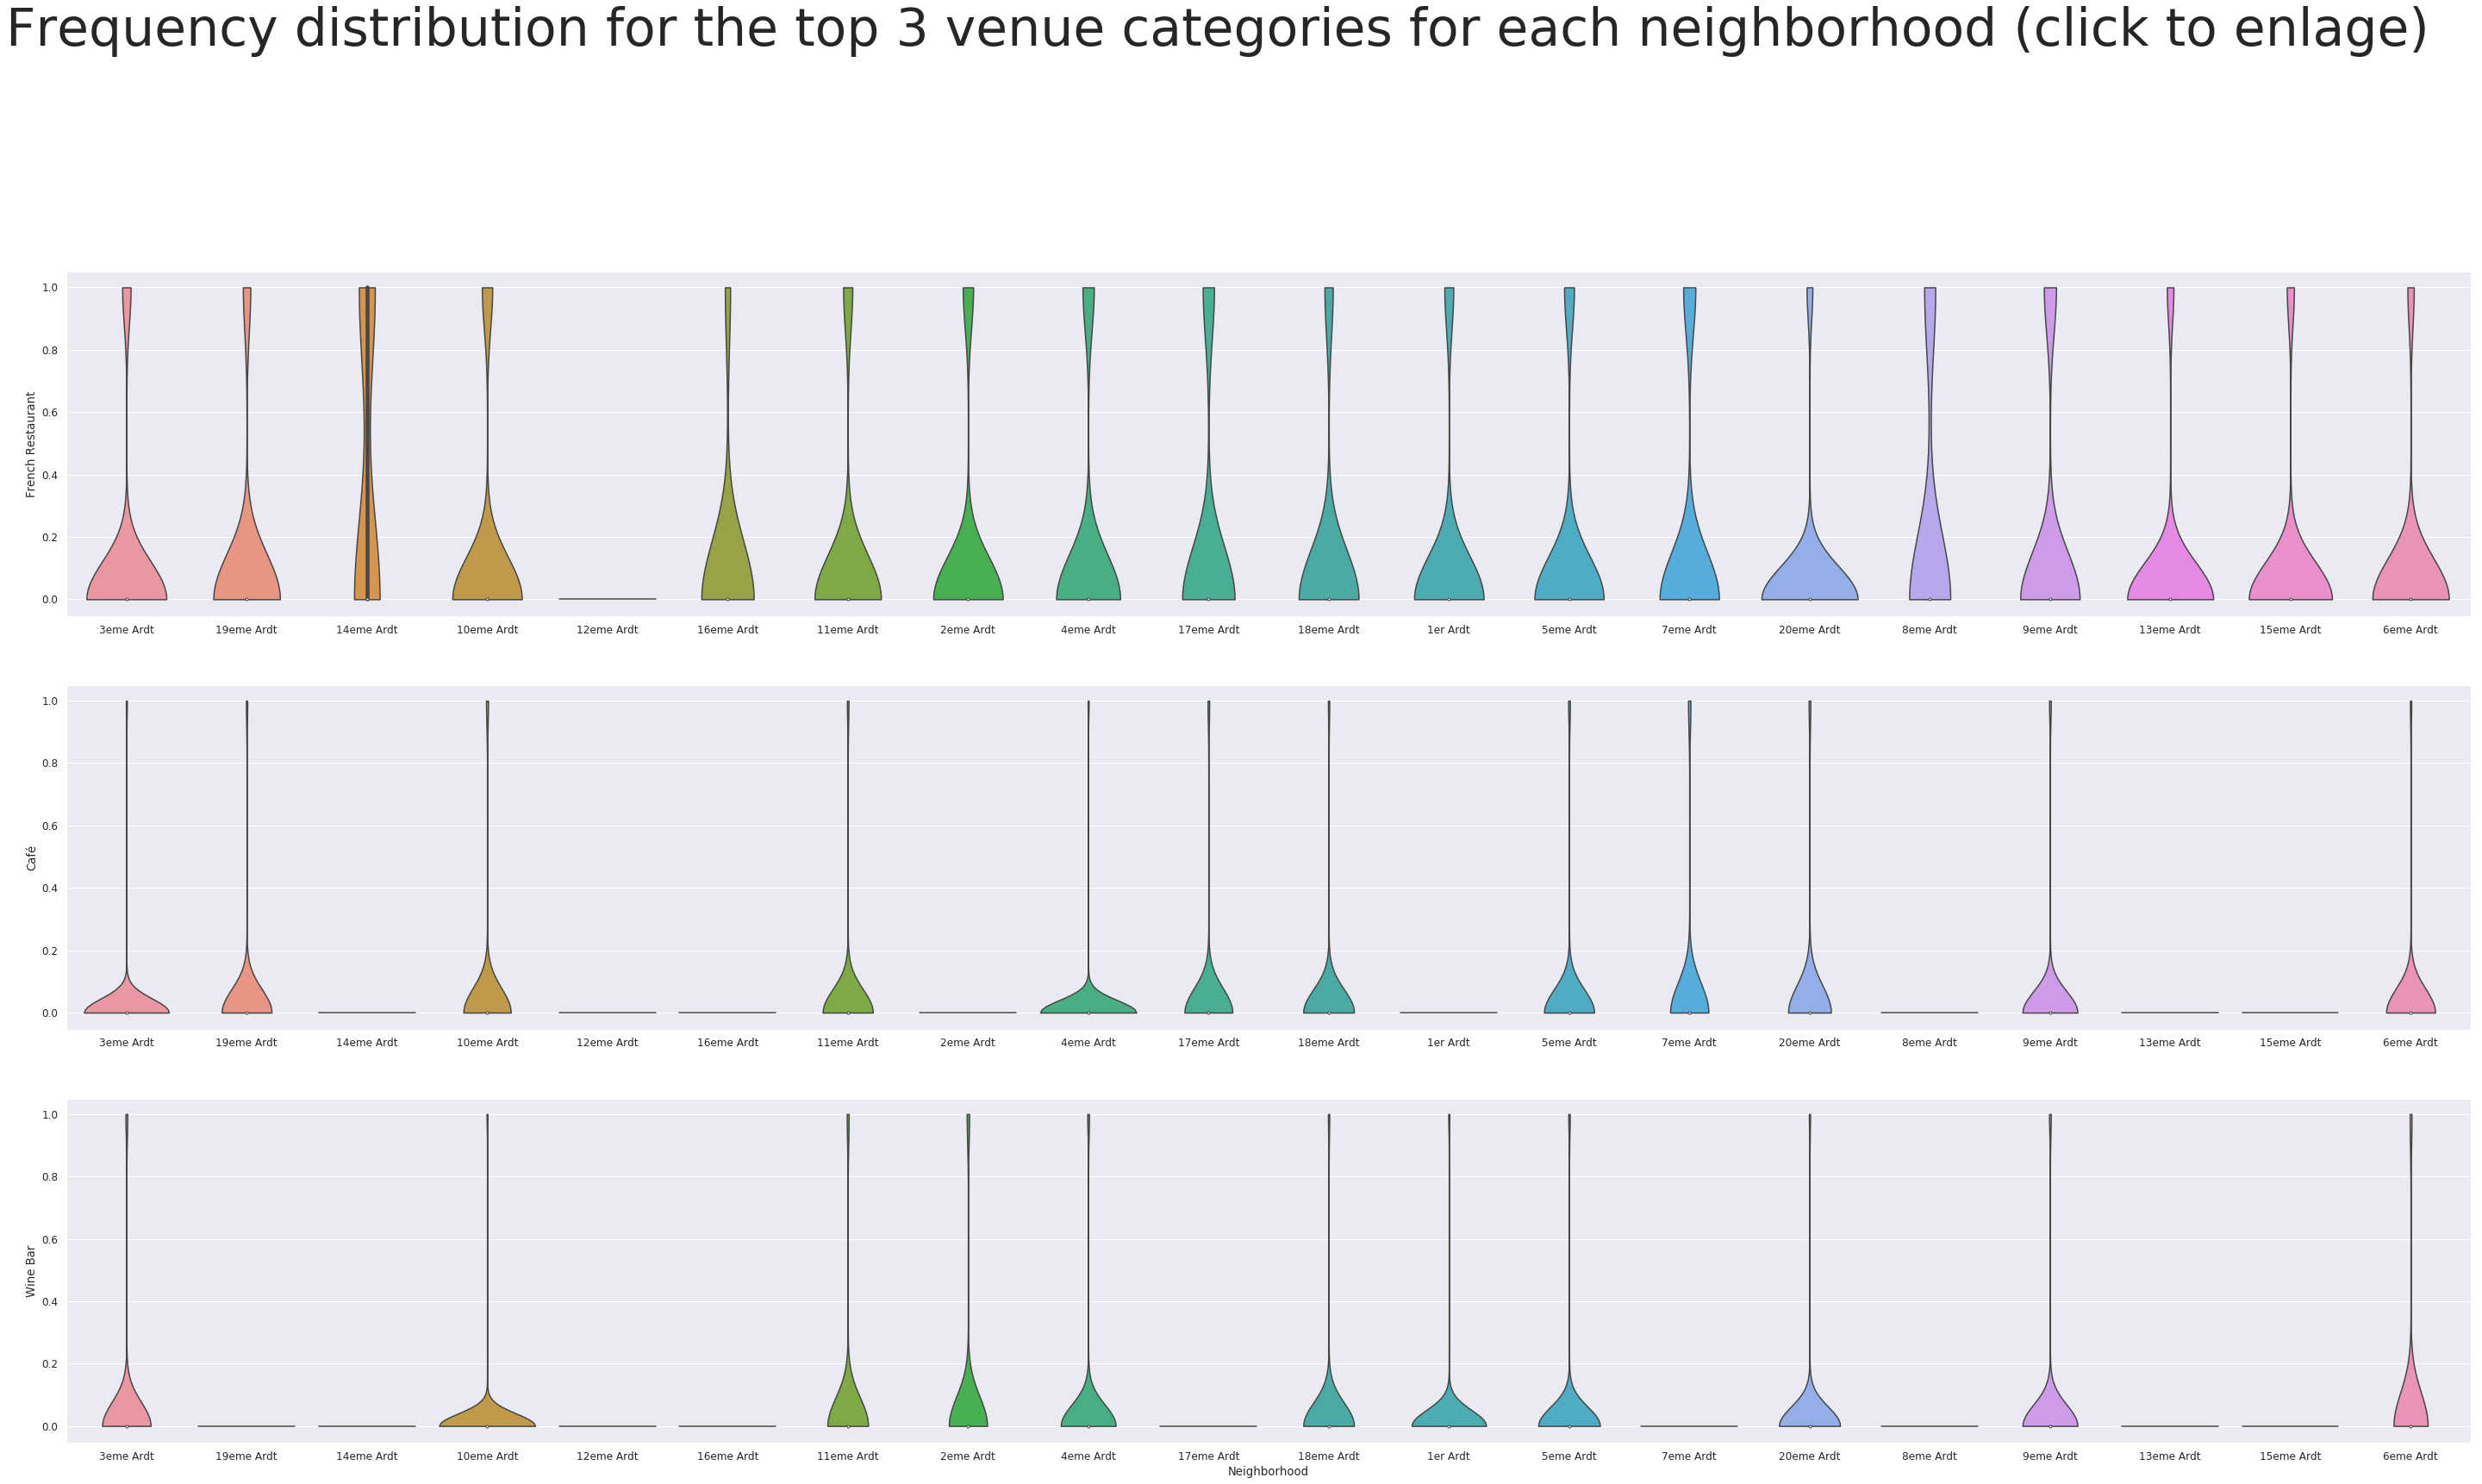

In [50]:
# Categorical plot
# Explore a plot of this data (a violin plot is used which is a density estimation of the underlying distribution).
# The top 3 venue types as specified by the client for each neighborhood are used for the plotting.

import seaborn as sns

fig = plt.figure(figsize=(50,25))
sns.set(font_scale=1.1)

ax = plt.subplot(3,1,1)
sns.violinplot(x="Neighborhood", y="French Restaurant", data=paris_onehot, cut=0);
plt.xlabel("")

ax = plt.subplot(3,1,2)
sns.violinplot(x="Neighborhood", y="Café", data=paris_onehot, cut=0);
plt.xlabel("")

plt.subplot(3,1,3)
sns.violinplot(x="Neighborhood", y="Wine Bar", data=paris_onehot, cut=0);

ax.text(-1.0, 3.1, 'Frequency distribution for the top 3 venue categories for each neighborhood (click to enlage)', fontsize=60)
plt.savefig ("Distribution_Frequency_Venues_3_categories.png", dpi=240)
plt.show()

In [51]:
import matplotlib.pyplot as plt

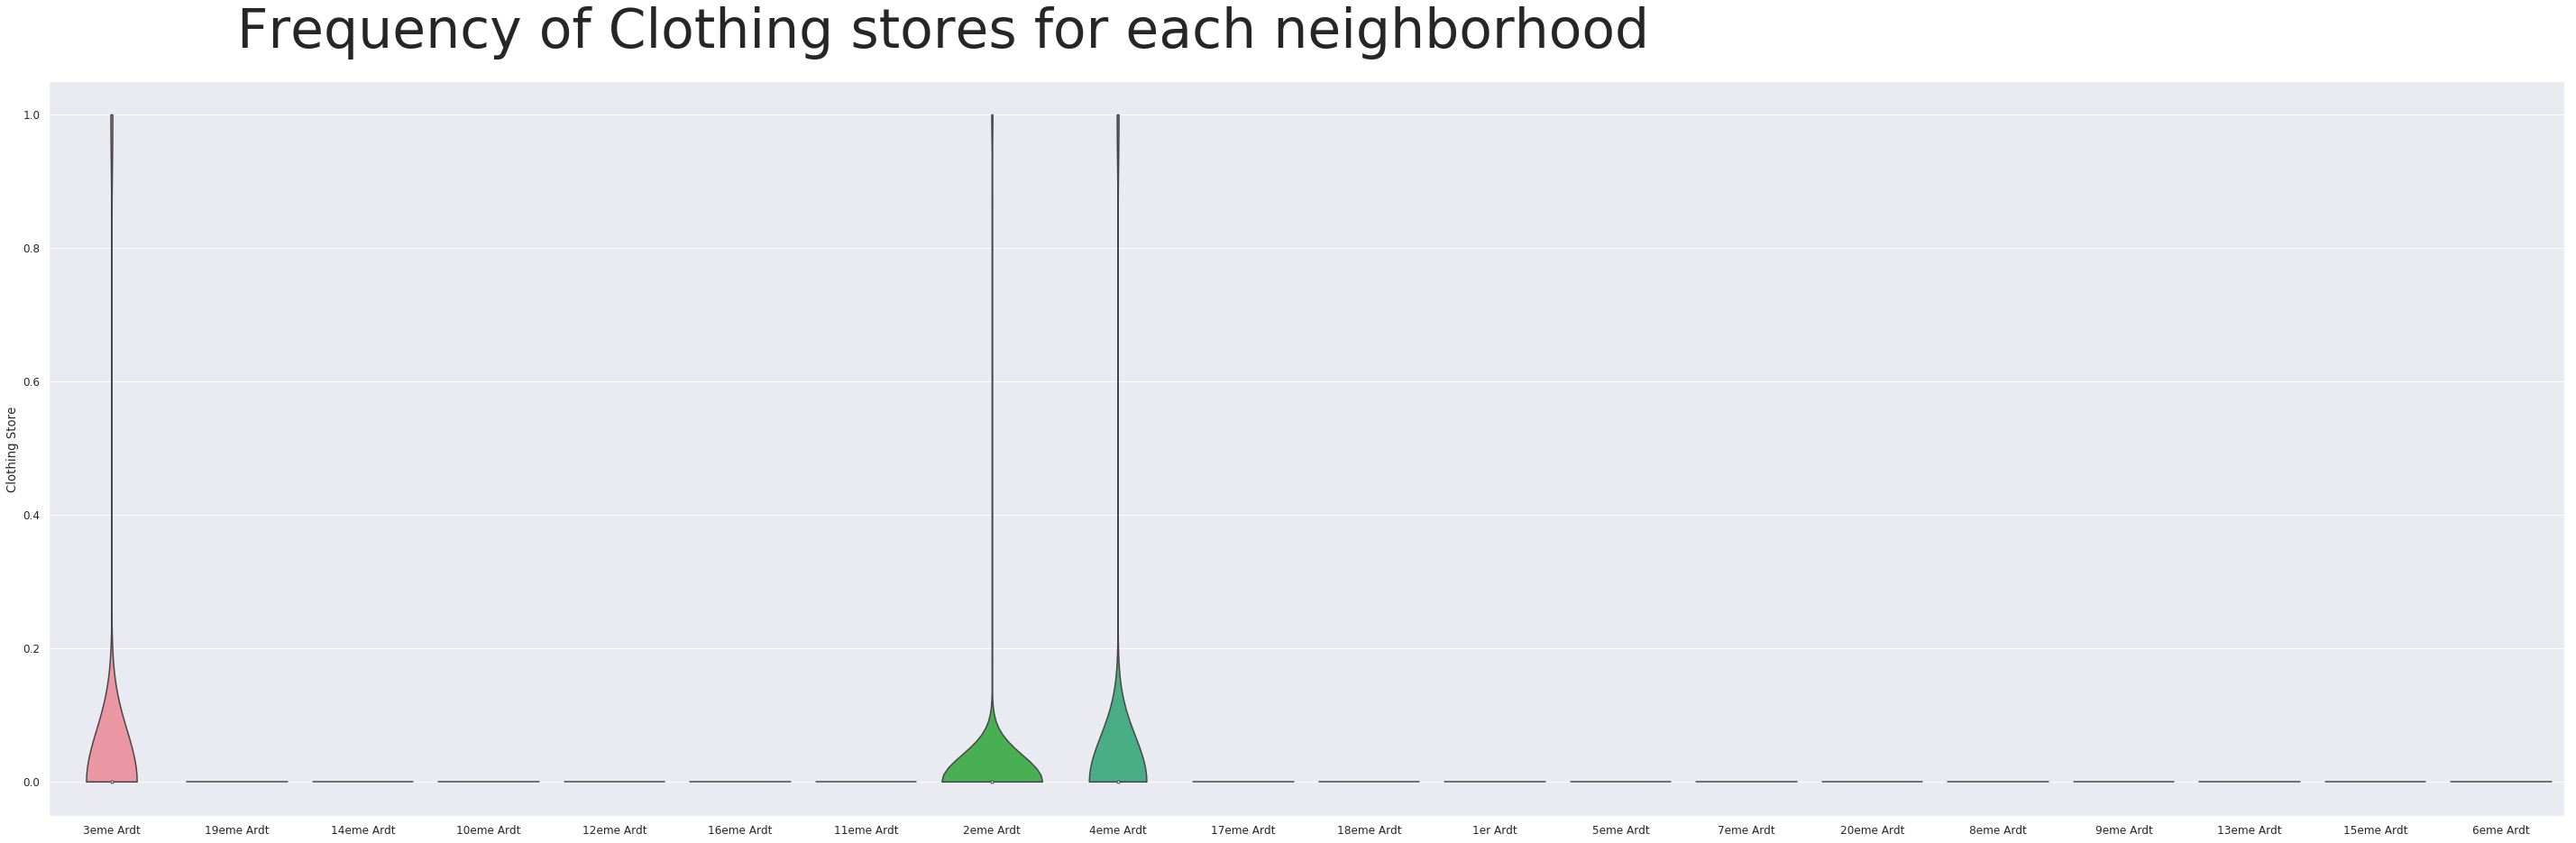

In [52]:
import seaborn as sns

fig = plt.figure(figsize=(50,15))
sns.set(font_scale=1.1)

ax = plt.subplot(1,1,1)
sns.violinplot(x="Neighborhood", y="Clothing Store", data=paris_onehot, cut=0);
plt.xlabel("")

ax.text(1.0, 1.1, 'Frequency of Clothing stores for each neighborhood', fontsize=60)
plt.savefig ("Distribution_Frequency_Clothing_Venues.png", dpi=240)
plt.show()

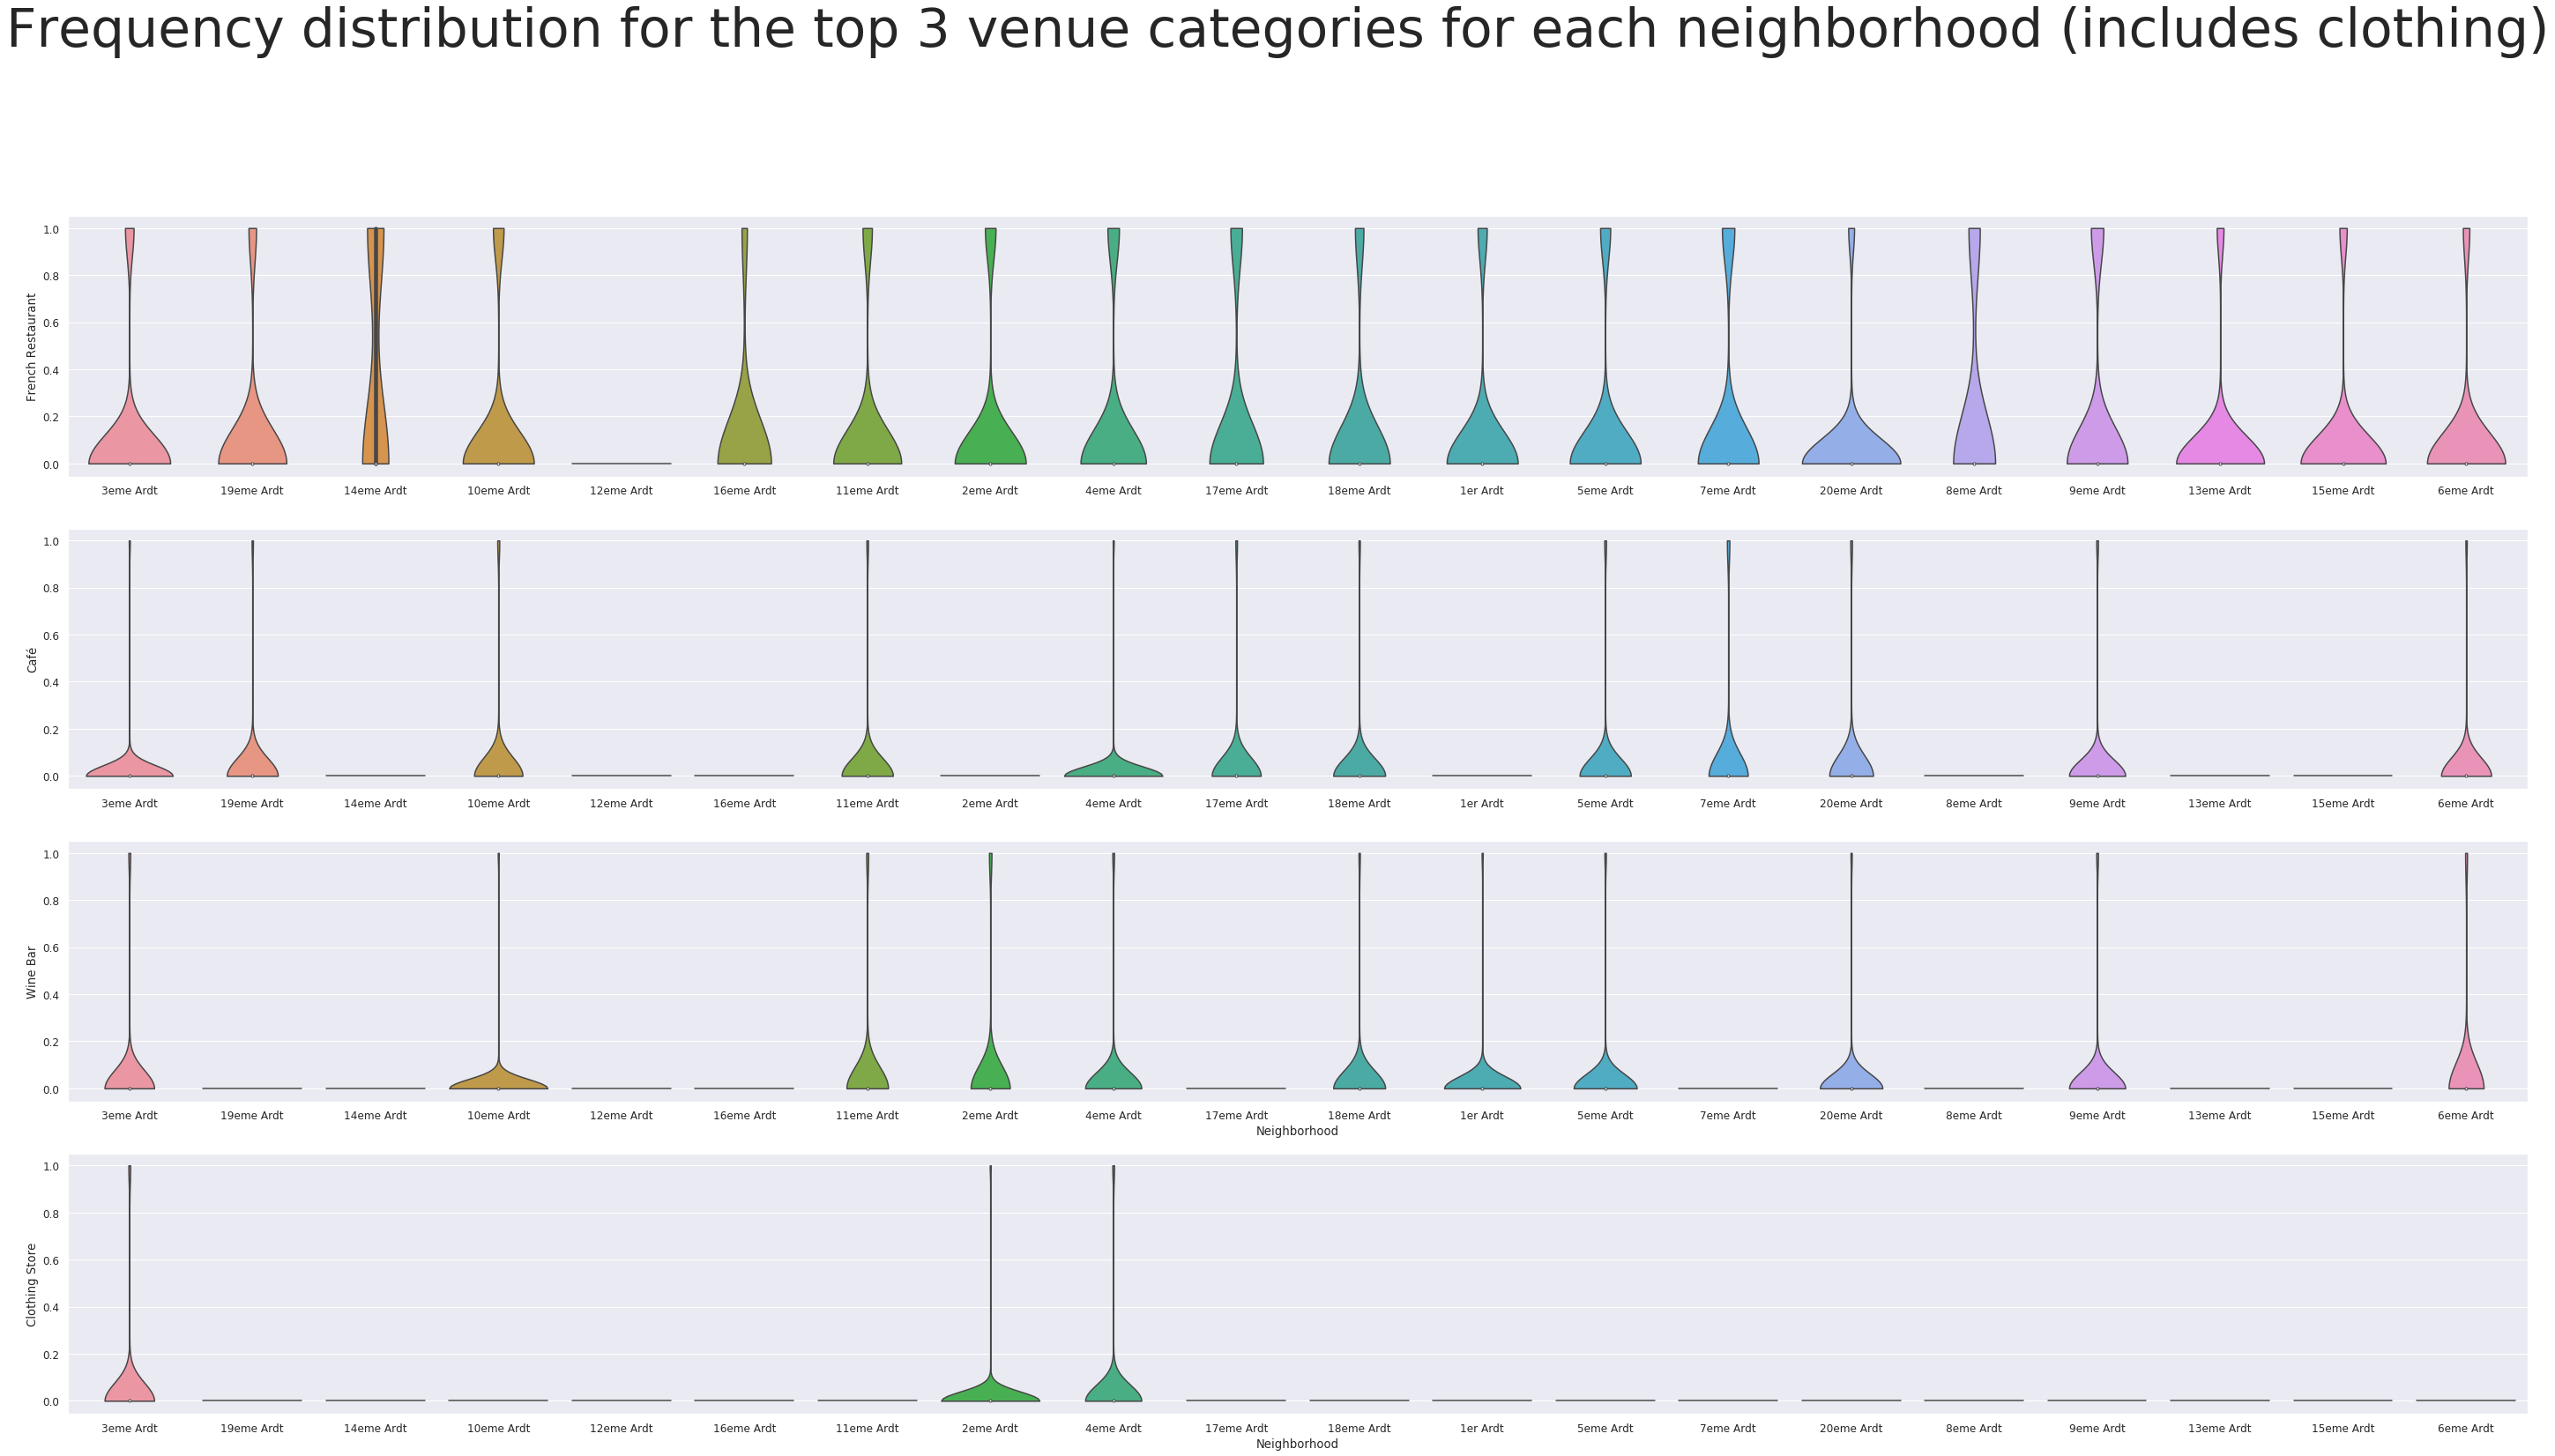

In [53]:
import seaborn as sns

fig = plt.figure(figsize=(50,25))
sns.set(font_scale=1.1)

ax = plt.subplot(4,1,1)
sns.violinplot(x="Neighborhood", y="French Restaurant", data=paris_onehot, cut=0);
plt.xlabel("")

ax = plt.subplot(4,1,2)
sns.violinplot(x="Neighborhood", y="Café", data=paris_onehot, cut=0);
plt.xlabel("")

plt.subplot(4,1,3)
sns.violinplot(x="Neighborhood", y="Wine Bar", data=paris_onehot, cut=0);

plt.subplot(4,1,4)
sns.violinplot(x="Neighborhood", y="Clothing Store", data=paris_onehot, cut=0);

ax.text(-1.0, 3.1, 'Frequency distribution for the top 3 venue categories for each neighborhood (includes clothing)', fontsize=60)
plt.savefig ("Distribution_Frequency_Venues_3_categories_clothing.png", dpi=240)
plt.show()

In [54]:
chosen_districts = pd.read_csv('https://raw.githubusercontent.com/AR-data-science/Coursera_Capstone/master/Week%205/Chosen.csv')
chosen_districts

Arrondissement_Num    Neighborhood French_Name   Latitude  Longitude
0                   3          Temple   3eme Ardt  48.862872   2.360001
1                   4  Hotel-de-Ville   4eme Ardt  48.854341   2.357630
2                   6      Luxembourg   6eme Ardt  48.849130   2.332898

In [55]:
map_chosen_districts = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map
for lat, lng, label in zip(chosen_districts['Latitude'], chosen_districts['Longitude'], chosen_districts['French_Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=45,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.2,
        parse_html=False).add_to(map_chosen_districts)  
    
map_chosen_districts

In [56]:
map_chosen_districts = folium.Map(location=[latitude, longitude], zoom_start=15)

# add markers to map
for lat, lng, label in zip(chosen_districts['Latitude'], chosen_districts['Longitude'], chosen_districts['French_Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=130,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.2,
        parse_html=False).add_to(map_chosen_districts)  
    
map_chosen_districts